# Notes
* This lecture is about multiple input regression and logistic regression

## Multiple Input Linear Regression

In [19]:
import numpy as np
from sklearn import datasets
import matplotlib.pyplot as plt 
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [30]:

x, y, coef = datasets.make_regression(n_samples=100,#number of samples
                                      n_features=3,#number of features
                                      n_informative=2,#number of useful features 
                                      n_targets=1, # num output features
                                      noise=25,#bias and standard deviation of the guassian noise
                                      coef=True,#true coefficient used to generated the data
                                      random_state=12) #set for same data points for each run

x_trans = np.transpose(x)

x1 = x_trans[0] 
x_trans[0] = np.interp(x1, (x1.min(), x1.max()), (0, 20)) # years experiance

x2 = x_trans[1]
x_trans[1] = np.rint(np.interp(x2, (x2.min(), x2.max()), (0, 1))) # eats hoagies


x3 = x_trans[2]
x_trans[2] =np.interp(x3, (x3.min(), x3.max()), (0, 12)) # years post high school education


# Scale target y (salary) to range 20000..150000 
y = np.interp(y, (y.min(), y.max()), (20000, 150000))


x = x_trans.T


In [31]:
x_train, x_test, y_train, y_test = train_test_split(x,y)

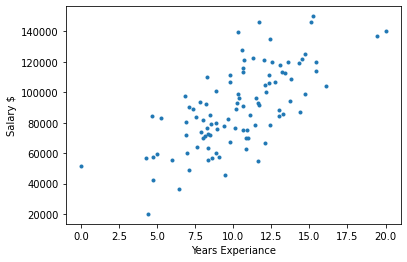

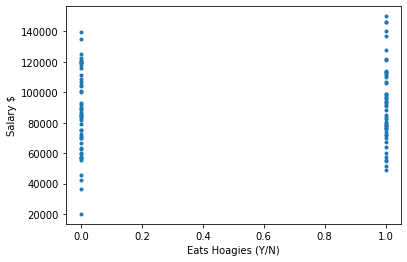

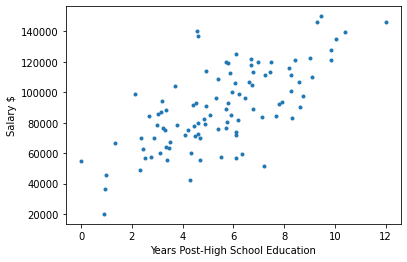

In [32]:
feature_names = ['Years Experiance', 'Eats Hoagies (Y/N)', 'Years Post-High School Education']

for i in range(3): 

    plt.plot(x_trans[i],y,'.',label='training data')
    plt.xlabel(feature_names[i])
    plt.ylabel('Salary $')
    plt.show()

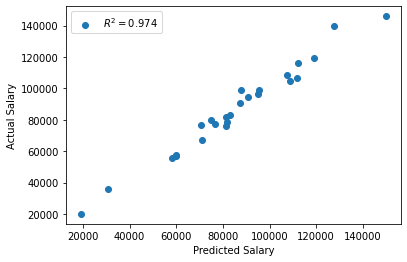

In [38]:
ols = LinearRegression(normalize=True)

ols = ols.fit(x_train, y_train)

r_sq = f"{ols.score(x_test, y_test):.3f}"

plt.scatter(ols.predict(x_test), y_test, label=r"$R^2=$"+r_sq)
plt.legend()
plt.gca().set(xlabel='Predicted Salary', ylabel='Actual Salary')
plt.show()


In [39]:
print(ols.coef_)

[5606.64326125 1153.70692732 7974.03998037]


### RESULTS

* **BEST FIT EQUATION:**    $y' = 5606x_1+1153x_2+7974x_3$

    * (data was normalized in fit so no intercepts)
    * wondering about second feature? look into LASSO or RIDGE for regularization methods

## Logistic Regression
* use the sklearn doc: [link](https://scikit-learn.org/stable/auto_examples/linear_model/plot_logistic.html#sphx-glr-auto-examples-linear-model-plot-logistic-py)

![equation](https://www.learnbymarketing.com/wp-content/uploads/2017/09/logistic-reg-formula-e1504965903637.png)